In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('1673873196_hr_comma_sep.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data preprocessing (EDA)

In [4]:
df.shape

(14999, 10)

### 1. Check for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

### DATA has NO Missing Values Values

### 2. Understand what factors contributed most to employee turnover

#### 2.1 Heatmap of numerical values

In [7]:
# drop columns sales and salary 
heat_data = df.drop(['sales', 'salary'], axis =1 )

<Axes: >

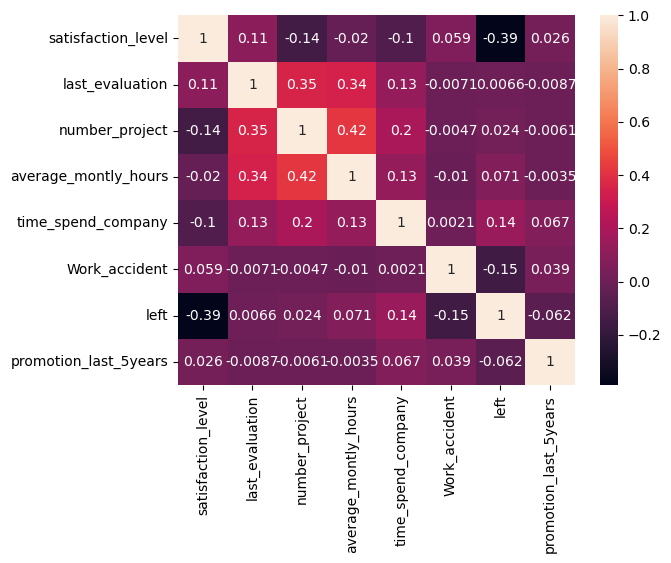

In [8]:
sns.heatmap(data = heat_data.corr(), annot=True)

#### Inference from heatmap
1. Little correlation between any feature
2. highest negative correlation between satisfaction level and left. 
3. highest postive correlation between number of projects and average monthly work hours. 


#### 2.2 Distribution Plot

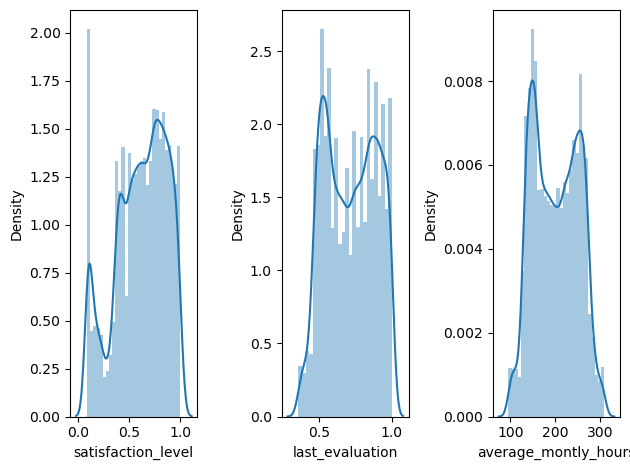

In [9]:
plt.subplot(1, 3, 1)
sns.distplot(df["satisfaction_level"])

plt.subplot(1, 3, 2)
sns.distplot(df["last_evaluation"])

plt.subplot(1, 3, 3)
sns.distplot(df["average_montly_hours"])

plt.tight_layout()



### Inference from distribution plot. 
1. last evaluation and average monthly hours overlap in shape 
2. satisfaction spikes has outliers in the non satisfaction peak. 
3. Monthly hours peak between 160 and 270 hours. 270hours work month means more than 12.5 hours work days! 

#### 2.3 Bar Plot of Employee Project Count including the employes who left. 

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, ' Number of Projects: Employed vs. Left')

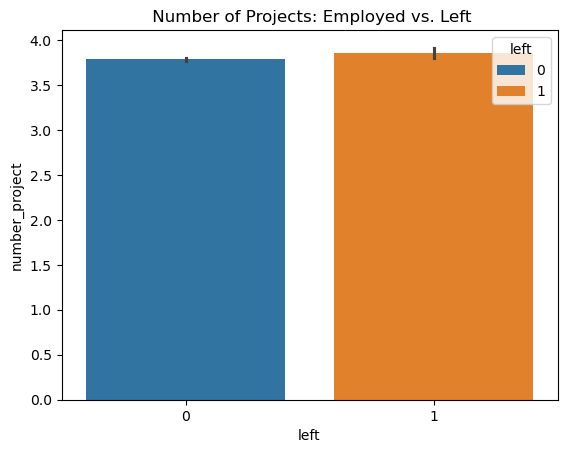

In [11]:
sns.barplot(x= df["left"], y = df["number_project"], hue = df['left'])
plt.title(" Number of Projects: Employed vs. Left")


#### Inference from the plot: 
1. Little difference in project numbers between people who still work and people who left. 
2. this plot does not tell anything about the satisfaction of the people who still work at the company.
3. 3.7 projects on average for people who still work at the company, might still be too many.

### 3 Clustering of Employees who left based on their satsifaction and evaluation 

#### 3.1 choose columns: satisfaction_level, last_eval and left

In [12]:
cluster_dat = df[["satisfaction_level", "last_evaluation", "left"]]

In [13]:
cluster_dat.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [14]:
# get only cases where people have left 

left = cluster_dat[cluster_dat['left'] == 1]

#### 3.2 KMeans Clustering of employees who left the company into 3 clusters. 

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(left)
labels = kmeans.fit_predict(left)
labels
left["clusters"] = labels

In [17]:
centroids = kmeans.cluster_centers_
centroids

array([[0.41014545, 0.51698182, 1.        ],
       [0.80851586, 0.91170931, 1.        ],
       [0.11115466, 0.86930085, 1.        ]])

Text(0.5, 1.0, 'People Who Left')

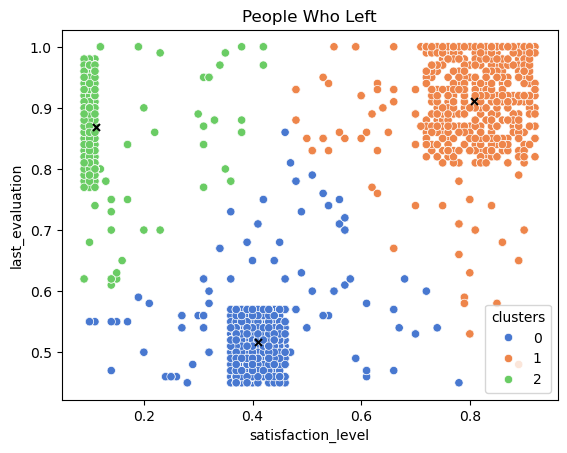

In [18]:
sns.scatterplot(x = 'satisfaction_level', y = 'last_evaluation', data =left , hue = 'clusters', palette = 'muted')
plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s = 25, c ="black")
plt.title("People Who Left")

#### Inference from the Clusters 
1. Cluster 2, high evaluation score, but lowest satisfaction (Perhaps too many Projects)
2. Cluster 0, low evaluation score and medium satisfaction. 
3. Cluster 1, high evalution score, highest satisfaction. (Better offer elsewhere)
4. All of the people left the ones with the highest Eval Score are highly trained and good at what they do. Likely the ones who are most unsatsified, are overworked. And the ones ones who have highest satisfaction level, get paid too little. 
5. One needs to check with the Salary as well.

### 4. Handle the left Class imbalance using SMOTE technique. 


#### 4.1 Pre-Process the data by converting categorical columns to numerical columns

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# separate data into numerical and categorical 
numerical = df.drop(['sales', 'salary'], axis=1)
numerical.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [21]:
categorical = df[['sales', 'salary']]
categorical.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [22]:
le = LabelEncoder()
for var in categorical:
    categorical[var] = le.fit_transform(categorical[var])

In [23]:
categorical.head()

,sales,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


In [29]:
# combined datasets again 
df = pd.concat([numerical, categorical], axis = 1)

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


#### 4.2  do the stratified split into 80:20 with random state=123

In [35]:
new_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary']


In [36]:
X = df[new_cols]
y = df['left']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### 4.3 Upsample the train data set 

In [41]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train , y_train)

### 5 Model Building 

#### 5.1 Logistic Regression Model with 5 fold CV plus Classification Report

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train , y_train)
model_logistic.score(X_train, y_train)

0.763160774871402

In [44]:
model_logistic.score(X_test, y_test)

0.743

In [45]:
cross_val_score(model_logistic, X_test, y_test, cv = 5).mean()

0.7636666666666667

#### Classification Report Logistic Regression

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      2291
           1       0.47      0.75      0.58       709

    accuracy                           0.74      3000
   macro avg       0.69      0.74      0.70      3000
weighted avg       0.80      0.74      0.76      3000



#### 5.2 Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, max_depth=4)
model_rf.fit(X_train , y_train)
model_rf.score(X_train, y_train)

0.941665754624056

In [53]:
model_rf.score(X_test, y_test)

0.9433333333333334

#####  Inference from Random Forest Model 
1. probably overfitted, but pruned to 4 levels.

In [54]:
cross_val_score(model_rf, X_test, y_test, cv = 5).mean()

0.9333333333333333

#### Classfication Report Random Forest

In [55]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2291
           1       0.85      0.92      0.88       709

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.95      0.94      0.94      3000



In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=100)
model_gb.fit(X_train , y_train)
model_gb.score(X_train, y_train)

0.9587939148517018

In [60]:
cross_val_score(model_gb, X_test, y_test, cv = 5).mean()

0.9713333333333333

In [ ]:
#### Classfication Report Gradient Boosting 

In [61]:
print(classification_report(y_test, model_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2291
           1       0.90      0.94      0.92       709

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



### 6 Identify the best model and justify the evaluation Metrics 

#### 6.1 Find ROC/AUC Curve for each model and plot the ROC Curve

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Logistic Model ROC 

In [65]:
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])

#### Random Forest ROC 

In [66]:
rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

#### Gradient Boosting ROC 

In [67]:
gb_roc_auc = roc_auc_score(y_test, model_gb.predict(X_test))
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, model_gb.predict_proba(X_test)[:,1])

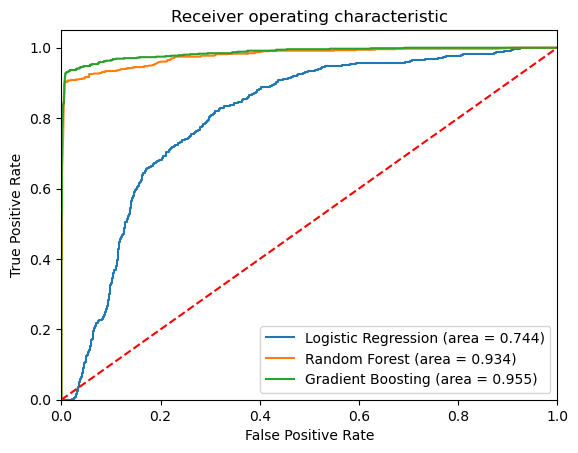

In [68]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.3f)' % gb_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### From the above AUC-ROC plot we can confirm that the best model to use is Gradient Boosting or Random Forest.

#### 6.2 Find the confusion Matrix for each model

In [70]:
from sklearn.metrics import  confusion_matrix

#### confusion matrix logistic regression model 

In [71]:
confusion_matrix(y_test, model_logistic.predict(X_test))

array([[1700,  591],
       [ 180,  529]])

#### confusion matrix Random Forest Model 

In [72]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[2180,  111],
       [  59,  650]])

#### confusion matrix Gradient Boost Model

In [73]:
confusion_matrix(y_test, model_gb.predict(X_test))

array([[2220,   71],
       [  42,  667]])

#### Inference from Confusion matrix 
1. While Random Forest and Gradient Boosting have both a high precision to identify true pos and true negative, the false postives and false negatives can better be assed by RECALL. 

### 7 Suggest Rentention Strategies for targeted employees.

#### 7.1 Using the best model predict the probability of employee turnover in th test data.
1. in this case the gradient boosting model

In [75]:
y_prob = model_gb.predict_proba(X_test)

In [76]:
y_prob

array([[0.9716281 , 0.0283719 ],
       [0.95887206, 0.04112794],
       [0.99252487, 0.00747513],
       ...,
       [0.05939267, 0.94060733],
       [0.96570189, 0.03429811],
       [0.95444648, 0.04555352]])

In [77]:
turnover_prob = y_prob[:, 1]

In [78]:
turnover_prob

array([0.0283719 , 0.04112794, 0.00747513, ..., 0.94060733, 0.03429811,
       0.04555352])

In [85]:
safe_zone_threshold = 0.20  # 20%
low_risk_zone_threshold = 0.40  # 40%
moderate_risk_zone_threshold = 0.60  # 60%

# High risk is anything above moderate risk

# Categorize employees based on probability scores
def categorize_employee(probability_score):
    if probability_score < safe_zone_threshold:
        return "Safe Zone (Green)"
    elif probability_score < low_risk_zone_threshold:
        return "Low Risk Zone (Yellow)"
    elif probability_score < moderate_risk_zone_threshold:
        return "Moderate Risk Zone (Orange)"
    else:
        return "High Risk Zone (Red)"

# Categorize employees in the test set
employee_categories = [categorize_employee(score) for score in turnover_prob]

# Print the categorized employees
for i, category in enumerate(employee_categories):
    print(f"Employee {i+1}: {category}")

Employee 1: Safe Zone (Green)
Employee 2: Safe Zone (Green)
Employee 3: Safe Zone (Green)
Employee 4: Safe Zone (Green)
Employee 5: Safe Zone (Green)
Employee 6: Safe Zone (Green)
Employee 7: High Risk Zone (Red)
Employee 8: High Risk Zone (Red)
Employee 9: Safe Zone (Green)
Employee 10: Safe Zone (Green)
Employee 11: Safe Zone (Green)
Employee 12: Safe Zone (Green)
Employee 13: Safe Zone (Green)
Employee 14: Safe Zone (Green)
Employee 15: Safe Zone (Green)
Employee 16: High Risk Zone (Red)
Employee 17: Safe Zone (Green)
Employee 18: High Risk Zone (Red)
Employee 19: Safe Zone (Green)
Employee 20: Safe Zone (Green)
Employee 21: Safe Zone (Green)
Employee 22: Safe Zone (Green)
Employee 23: Safe Zone (Green)
Employee 24: Safe Zone (Green)
Employee 25: Safe Zone (Green)
Employee 26: Moderate Risk Zone (Orange)
Employee 27: Low Risk Zone (Yellow)
Employee 28: High Risk Zone (Red)
Employee 29: High Risk Zone (Red)
Employee 30: Safe Zone (Green)
Employee 31: Safe Zone (Green)
Employee 32: Sa

### Retention Strategies: 
1. employees should be given less Working Hours
2. Number of projects should be no more than 4
3. Employee salary should be increased